# Simple models
This example demonstrates how giotto-time can be used for simple prediction pipelines

### Initializing the time series

In [1]:
import sys
sys.path.append('../')

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

from gtime.preprocessing import TimeSeriesPreparation
from gtime.compose import FeatureCreation
# from gtime.feature_generation import Calendar
from gtime.time_series_models import (
    NaiveForecastModel, 
    SeasonalNaiveForecastModel, 
    AverageForecastModel, 
    DriftForecastModel,
)

In [100]:
def pred_to_plot(y_pred):
    start = y_pred.index.min()
    len_y = len(y_pred.columns)
    window = len_y * pd.Timedelta(y_pred.index.freq)
    end=y_pred.index.max() + window
    ix = pd.period_range(start=start, end=end)
    res = pd.DataFrame(np.nan, index=ix, columns=y_pred.index)
    j = 1
    for i, row in y_pred.iterrows():
        res.loc[i+pd.Timedelta(y_pred.index.freq):i+window, i] = row.values
        j += 1
    return res

In [3]:
df_sp = pd.read_csv('data/^GSPC.csv')
df_sp.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,2476.959961,2519.489990,2467.469971,2510.030029,2510.030029,3733160000
1,2019-01-03,2491.919922,2493.139893,2443.959961,2447.889893,2447.889893,3822860000
2,2019-01-04,2474.330078,2538.070068,2474.330078,2531.939941,2531.939941,4213410000
3,2019-01-07,2535.610107,2566.159912,2524.560059,2549.689941,2549.689941,4104710000
4,2019-01-08,2568.110107,2579.820068,2547.560059,2574.409912,2574.409912,4083030000


In [4]:
df_close = df_sp.set_index('Date')['Close']

In [5]:
df_close.index = pd.to_datetime(df_close.index)

### Time Series Preparation
The input time series has to be a `DataFrame` with a `PeriodIndex`. Use the provided class `TimeSeriesPreparation` to convert the time series into this format.

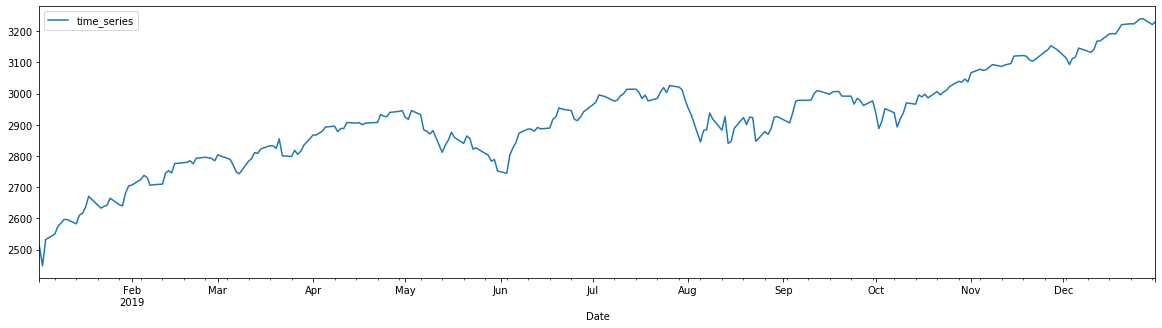

In [22]:
time_series_preparation = TimeSeriesPreparation()
period_index_time_series = time_series_preparation.transform(df_close)
period_index_time_series.plot(figsize=(20, 5))
plt.show()

### Naïve model

In [121]:
model = NaiveForecastModel(horizon=60)
model.fit(period_index_time_series)

In [122]:
y_pred = model.predict()
y_plot = pred_to_plot(y_pred)
for i in y_plot.columns:
    y_plot.loc[i, i] = period_index_time_series.loc[i].values

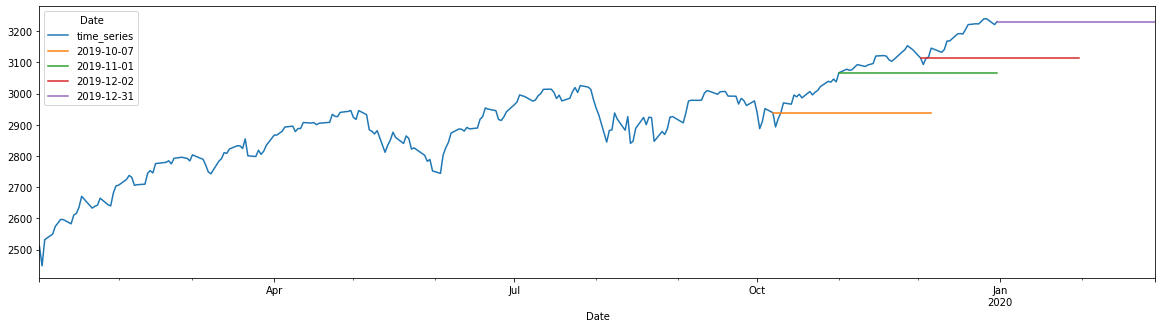

In [123]:
ax = period_index_time_series.plot(figsize=(20, 5))
y_plot.iloc[:, [0, 19, 39, 59]].plot(ax=ax)
plt.show()

### Seasonal naïve model

In [118]:
model = SeasonalNaiveForecastModel(horizon=60, seasonal_length=30)
model.fit(period_index_time_series)

In [119]:
y_pred = model.predict()
y_plot = pred_to_plot(y_pred)
for i in y_plot.columns:
    y_plot.loc[i, i] = period_index_time_series.loc[i].values

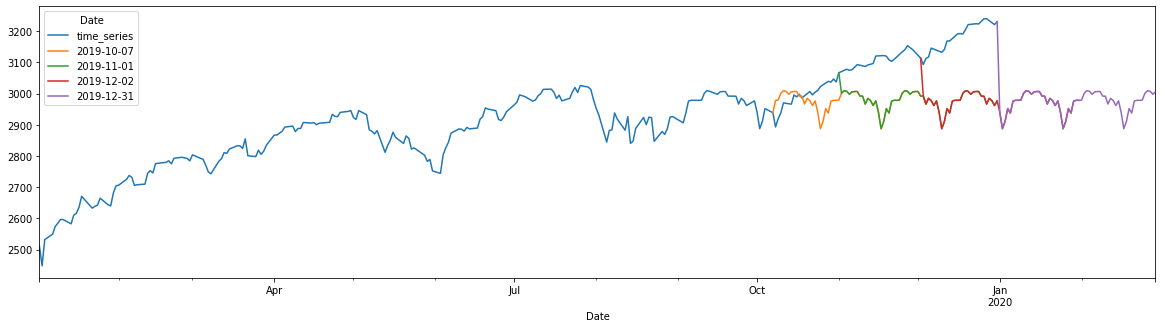

In [120]:
ax = period_index_time_series.plot(figsize=(20, 5))
y_plot.iloc[:, [0, 19, 39, 59]].plot(ax=ax)
plt.show()

### Average model

In [115]:
model = AverageForecastModel(horizon=60)
model.fit(period_index_time_series)

In [116]:
y_pred = model.predict()
y_plot = pred_to_plot(y_pred)
for i in y_plot.columns:
    y_plot.loc[i, i] = period_index_time_series.loc[i].values

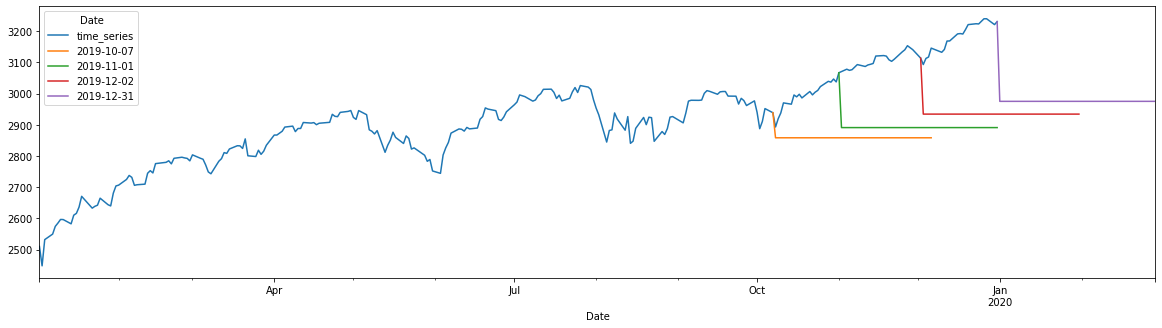

In [117]:
ax = period_index_time_series.plot(figsize=(20, 5))
y_plot.iloc[:, [0, 19, 39, 59]].plot(ax=ax)
plt.show()

### Drift model

In [108]:
model = DriftForecastModel(horizon=60)
model.fit(period_index_time_series)

In [109]:
y_pred = model.predict()
y_plot = pred_to_plot(y_pred)
for i in y_plot.columns:
    y_plot.loc[i, i] = period_index_time_series.loc[i].values

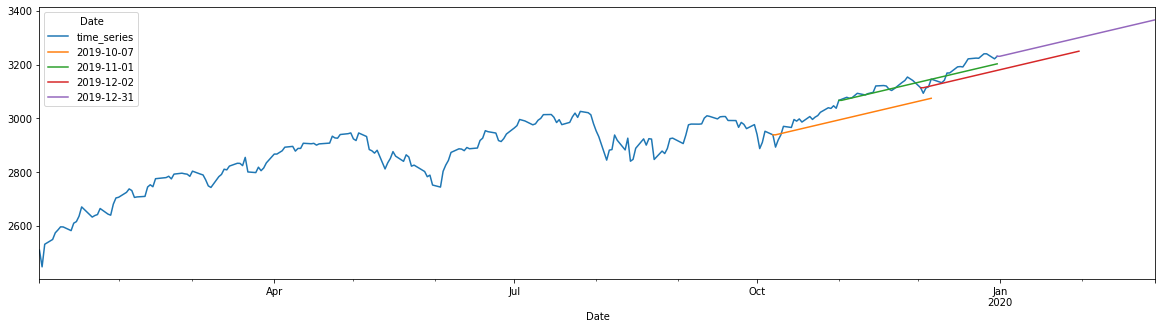

In [112]:
ax = period_index_time_series.plot(figsize=(20, 5))
y_plot.iloc[:, [0, 19, 39, 59]].plot(ax=ax)
plt.show()